In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import sklearn

#建立與 MySQL 的連結
class mysql_engine():
 def __init__(self,db):
  self.user='root'
  self.passwd='ian1991'
  self.host='localhost'
  self.port = '3306'
  self.db_name= db
  self.engine = create_engine('mysql+pymysql://{0}:{1}@{2}:{3}/{4}?charset=utf8'.format(self.user,self.passwd,self.host,self.port,self.db_name))

def get_data(sql,db):
 pg_enine = mysql_engine(db)
 try:
  with pg_enine.engine.connect() as con, con.begin():
   df = pd.read_sql(sql,con) # 獲取資料
  con.close()
 except:
  df = None
 return df

In [2]:
company_factor = get_data("""SELECT * FROM tfb103d_project.datamining_alldata_afetl;""",'tfb103d_project')
company_factor

,stock_code,stock_report_date,operating_gross_rate,net_profit_rate,revenue_growth_rate,current_rate,quick_rate,debt_rate,receivables_turnover_rate,cash_reinvest_rate,...,export_usd_value_37071000,export_usd_value_37079090,export_usd_value_37050000306,export_usd_value_848620,export_usd_value_848610,export_usd_value_381800,new_cases_smoothed_USA,new_cases_smoothed_OWID_EUR,new_cases_smoothed_TWN,people_fully_vaccinated_per_hundred_USA
0,2302,20183,38.03,13.35,17.77,154.53,103.70,18.22,3.31,1.74,...,433,15698,18323,61504,3021,107270,0.00,0.00,0.00,0.00
1,2302,20184,40.93,5.22,-0.91,166.92,110.41,16.86,4.35,1.34,...,395,17864,27973,93168,2669,112119,0.00,0.00,0.00,0.00
2,2302,20191,37.03,-3.00,-6.33,171.94,109.89,16.38,0.99,1.51,...,309,16779,17192,72410,4024,96978,0.00,0.00,0.00,0.00
3,2302,20192,32.10,10.26,-2.46,174.72,114.79,16.63,2.00,2.17,...,326,19927,19788,77517,3432,98799,0.00,0.00,0.00,0.00
4,2302,20193,28.78,2.29,-6.54,170.04,116.92,17.45,3.10,4.32,...,339,20499,19911,118643,3547,90681,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,8299,20202,24.76,10.91,10.95,299.48,181.73,27.74,4.28,6.49,...,474,20831,23548,83758,1824,93532,26218.70,22066.62,4.34,0.00
1784,8299,20203,22.61,15.41,-3.71,363.99,240.63,23.66,6.20,5.25,...,362,21623,21166,88039,509,96949,50018.10,27565.47,4.07,0.00
1785,8299,20204,23.05,29.47,-2.52,317.33,230.20,26.09,8.12,11.28,...,338,22734,26507,125111,2209,104276,134753.31,197678.98,7.04,0.29
1786,8299,20211,29.71,13.09,0.17,281.91,191.93,29.32,1.95,-3.70,...,295,21578,21595,173860,3284,108639,120178.33,179397.16,6.49,15.95


<h1>資料前處理

In [3]:
#取得需要的特徵
financial_ratio = company_factor[['stock_code',
                                  'stock_report_date',
                                  'net_profit_rate', #稅後淨利率
                                  'operating_gross_rate', #營業毛利率
                                  'current_rate', #流動比率
                                  'quick_rate',  #速動比率
                                  'debt_rate',  #負債比率
                                  'receivables_turnover_rate', #應收帳款週轉率
                                  'cash_reinvest_rate', #現金再投資比率
                                  'roe_rate', #股東權益報酬率,
                                  'roa_rate', #資產報酬率
                                  'avg_director_rate', #董監事持股比利
                                  'avg_director_pledge_rate', #董監事質押比利
                                  'foreign_rate_bys', #外資持股比例
                                  'over1000_rate_bys', # >1000張大股東持股比率
                                  'under400_rate_bys', # <400張股東持股比率
                                  'avg_board_bys' #平均持股張數
                                 ]].copy() 
financial_ratio

,stock_code,stock_report_date,net_profit_rate,operating_gross_rate,current_rate,quick_rate,debt_rate,receivables_turnover_rate,cash_reinvest_rate,roe_rate,roa_rate,avg_director_rate,avg_director_pledge_rate,foreign_rate_bys,over1000_rate_bys,under400_rate_bys,avg_board_bys
0,2302,20183,13.35,38.03,154.53,103.70,18.22,3.31,1.74,1.07,0.91,26.60,0.00,4.40,62.23,33.99,8.73
1,2302,20184,5.22,40.93,166.92,110.41,16.86,4.35,1.34,0.42,0.37,26.60,0.00,4.40,62.35,34.08,8.86
2,2302,20191,-3.00,37.03,171.94,109.89,16.38,0.99,1.51,-0.20,-0.14,26.60,0.00,4.37,62.53,33.68,8.90
3,2302,20192,10.26,32.10,174.72,114.79,16.63,2.00,2.17,0.85,0.74,26.60,0.00,4.30,62.34,33.51,9.01
4,2302,20193,2.29,28.78,170.04,116.92,17.45,3.10,4.32,0.17,0.17,26.60,0.00,4.30,62.33,33.44,9.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,8299,20202,10.91,24.76,299.48,181.73,27.74,4.28,6.49,4.01,2.97,17.70,12.73,51.13,41.64,44.76,7.51
1784,8299,20203,15.41,22.61,363.99,240.63,23.66,6.20,5.25,6.07,4.61,18.23,17.90,45.53,37.24,51.68,6.58
1785,8299,20204,29.47,23.05,317.33,230.20,26.09,8.12,11.28,11.76,8.79,18.40,17.80,47.07,36.67,51.03,6.80
1786,8299,20211,13.09,29.71,281.91,191.93,29.32,1.95,-3.70,4.71,3.41,18.40,17.80,48.57,38.56,47.51,6.82


In [4]:
#缺值檢視
financial_ratio.isnull().sum()

stock_code                   0
stock_report_date            0
net_profit_rate              0
operating_gross_rate         0
current_rate                 0
quick_rate                   0
debt_rate                    0
receivables_turnover_rate    0
cash_reinvest_rate           0
roe_rate                     0
roa_rate                     0
avg_director_rate            0
avg_director_pledge_rate     0
foreign_rate_bys             0
over1000_rate_bys            0
under400_rate_bys            0
avg_board_bys                0
dtype: int64

In [5]:
# 將數值轉為 1,0 編碼，作為模型的預測目標(應變數)
def encoding(r,th):
    if r >= th:
        return 1
    else:
        return 0

In [6]:
#定義股東權益報酬率 >平均者為表現良好
m2 = financial_ratio['roe_rate'].mean()
financial_ratio['roe_rate1'] = financial_ratio.apply(lambda r : encoding(r['roe_rate'],m2), axis = 1)

In [7]:
X = financial_ratio[['current_rate', 
                     'quick_rate', 
                     'debt_rate', 
                     'operating_gross_rate',
                     'cash_reinvest_rate',
                     'avg_director_rate',
                     'avg_director_pledge_rate',
                     'foreign_rate_bys',
                     'over1000_rate_bys',
                     'under400_rate_bys',
                     'avg_board_bys']]

y = financial_ratio['roe_rate1']

print("y.shape: " ,y.shape)
print('y.sum():',y.sum())

y.shape:  (1788,)
y.sum(): 960


<h3>ROE:  828 筆標記為 0 ； 960 筆為 1

In [8]:
# 輸入數據調成標準值以免各特徵影響不同
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#分割資料為 測試集 與 訓練集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=1)
N, D = X_train.shape
print ("N:", N, "D:", D)

N: 1430 D: 11


# 1. 以財務數據預測 ROE

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,LeakyReLU
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
import tensorflow as tf
print(tf.__version__)

2.6.0


<h2> 1-1 以 DNN 實作預測 ROE

In [17]:
# 建立TF模型 for 淨利
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

#編譯模型
lr = 0.0003
model.compile(tf.keras.optimizers.Adam(learning_rate = lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1536      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 訓練模型
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5014 - val_loss: 0.6591 - val_accuracy: 0.6089
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.5608 - val_loss: 0.6374 - val_accuracy: 0.6564
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.6189 - val_loss: 0.6183 - val_accuracy: 0.7123
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6650 - val_loss: 0.5994 - val_accuracy: 0.7430
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.6860 - val_loss: 0.5802 - val_accuracy: 0.7626
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6958 - val_loss: 0.5598 - val_accuracy: 0.7654
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7224 - val_loss: 0.5448 - val_accuracy: 0.7570
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7944 - val_loss: 0.4462 - val_accuracy: 0.7989
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7874 - val_loss: 0.4443 - val_accuracy: 0.8017
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7944 - val_loss: 0.4449 - val_accuracy: 0.8045
Epoch 62/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7958 - val_loss: 0.4449 - val_accuracy: 0.8017
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7923 - val_loss: 0.4437 - val_accuracy: 0.8045
Epoch 64/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8049 - val_loss: 0.4456 - val_accuracy: 0.8017
Epoch 65/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7888 - val_loss: 0.4442 - val_accuracy: 0.8017
Epoch 

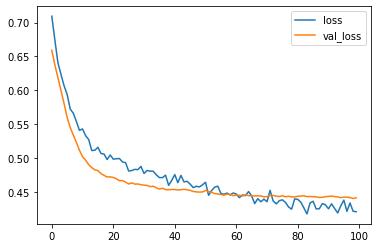

In [20]:
# 劃出 model.fit() training 和 validating 的 loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

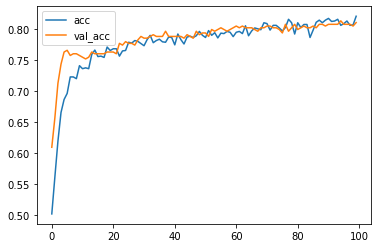

In [21]:
# 劃出準確性 accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
pred_test = model.predict(X_test)
pred_test = np.round(pred_test).flatten()
cm = confusion_matrix(y_test, pred_test)
cm

array([[133,  40],
       [ 31, 154]], dtype=int64)

In [58]:
#model3.save('./ROE_model.h5')

# 2.加入環境因素 預測 ROE

<h2>資料前處理

In [90]:
#取得需要的特徵
dF =  company_factor[['stock_code',
                                  'stock_report_date',
                                  'net_profit_rate', #稅後淨利率
                                  'operating_gross_rate', #營業毛利率
                                  'current_rate', #流動比率
                                  'quick_rate',  #速動比率
                                  'debt_rate',  #負債比率
#                                   'receivables_turnover_rate', #應收帳款週轉率
                                  'cash_reinvest_rate', #現金再投資比率
                                  'roe_rate', #股東權益報酬率,
#                                   'roa_rate', #資產報酬率
                                  'avg_director_rate', #董監事持股比利
                                  'avg_director_pledge_rate', #董監事質押比利
                                  'foreign_rate_bys', #外資持股比例
                                  'over1000_rate_bys', # >1000張大股東持股比率
                                  'under400_rate_bys', # <400張股東持股比率
                                  'avg_board_bys', #平均持股張數
                                  'import_kgm_weight_2801', 
                                  'import_kgm_weight_2804', 
                                  'import_kgm_weight_37071000',
                                  'import_kgm_weight_37079090',
                                  'import_kgm_weight_37050000306',
                                  'import_kgm_weight_848620',
                                  'import_kgm_weight_848610',
                                  'import_kgm_weight_381800',
                                  'import_usd_value_2801',
                                  'import_usd_value_2804',
                                  'import_usd_value_37071000',
                                  'import_usd_value_37079090',
                                  'import_usd_value_37050000306',
                                  'import_usd_value_848620',
                                  'import_usd_value_848610',
                                  'import_usd_value_381800',
                                  'avg_import_rate'
                                     ]].copy() 
dF

,stock_code,stock_report_date,net_profit_rate,operating_gross_rate,current_rate,quick_rate,debt_rate,cash_reinvest_rate,roe_rate,avg_director_rate,...,import_kgm_weight_381800,import_usd_value_2801,import_usd_value_2804,import_usd_value_37071000,import_usd_value_37079090,import_usd_value_37050000306,import_usd_value_848620,import_usd_value_848610,import_usd_value_381800,avg_import_rate
0,2302,20183,13.35,38.03,154.53,103.70,18.22,1.74,1.07,26.60,...,1409793,862,46597,2987,54333,27410,675685,44346,242172,30.719
1,2302,20184,5.22,40.93,166.92,110.41,16.86,1.34,0.42,26.60,...,1053753,834,48412,498,59877,20281,519909,30940,228487,30.901
2,2302,20191,-3.00,37.03,171.94,109.89,16.38,1.51,-0.20,26.60,...,1034009,732,39213,288,54298,20181,908995,51369,215901,30.880
3,2302,20192,10.26,32.10,174.72,114.79,16.63,2.17,0.85,26.60,...,898797,739,38985,934,58250,21878,744366,34141,218212,31.187
4,2302,20193,2.29,28.78,170.04,116.92,17.45,4.32,0.17,26.60,...,856956,680,30999,546,64807,25203,991427,24335,206041,31.248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,8299,20202,10.91,24.76,299.48,181.73,27.74,6.49,4.01,17.70,...,673790,777,34092,613,74795,21977,640466,26651,223348,29.941
1784,8299,20203,15.41,22.61,363.99,240.63,23.66,5.25,6.07,18.23,...,693142,795,35919,201,73581,22766,854227,36716,213329,29.499
1785,8299,20204,29.47,23.05,317.33,230.20,26.09,11.28,11.76,18.40,...,686162,847,41139,308,76867,23473,1333417,29918,226517,28.783
1786,8299,20211,13.09,29.71,281.91,191.93,29.32,-3.70,4.71,18.40,...,773485,956,45379,348,74262,24877,1261345,62151,238516,28.419


In [91]:
dF.isnull().sum()

stock_code                       0
stock_report_date                0
net_profit_rate                  0
operating_gross_rate             0
current_rate                     0
quick_rate                       0
debt_rate                        0
cash_reinvest_rate               0
roe_rate                         0
avg_director_rate                0
avg_director_pledge_rate         0
foreign_rate_bys                 0
over1000_rate_bys                0
under400_rate_bys                0
avg_board_bys                    0
import_kgm_weight_2801           0
import_kgm_weight_2804           0
import_kgm_weight_37071000       0
import_kgm_weight_37079090       0
import_kgm_weight_37050000306    0
import_kgm_weight_848620         0
import_kgm_weight_848610         0
import_kgm_weight_381800         0
import_usd_value_2801            0
import_usd_value_2804            0
import_usd_value_37071000        0
import_usd_value_37079090        0
import_usd_value_37050000306     0
import_usd_value_848

In [92]:
#定義股東權益報酬率 >平均者為表現良好
m2 = dF['roe_rate'].mean()
dF['roe_rate1'] = dF.apply(lambda r : encoding(r['roe_rate'],m2), axis = 1)

In [93]:
X1 = dF[['current_rate', #流動比率
        'quick_rate',  #速動比率
        'debt_rate',  #負債比率
        'operating_gross_rate', #營業毛利率
        'cash_reinvest_rate', #現金再投資比率
        'avg_director_rate', #董監事持股比利
        'avg_director_pledge_rate', #董監事質押比利
        'foreign_rate_bys', #外資持股比例
        'over1000_rate_bys', # >1000張大股東持股比率
        'under400_rate_bys', # <400張股東持股比率
        'avg_board_bys', #平均持股張數
        'avg_import_rate']] #美元匯率

y1 = dF['roe_rate1']
print("X1.shape: " ,X1.shape)
print("y1.shape: " ,y1.shape)
print('y1.sum():',y1.sum())


X1.shape:  (1788, 12)
y1.shape:  (1788,)
y1.sum(): 960


In [46]:
# 輸入數據調成標準值以免各特徵影響不同
# you'll learn why scaling is needed in a later course
# from sklearn.preprocessing import StandardScaler
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x-df_input.mean())/ df_input.std()))

In [47]:
X1_scaled = pd.DataFrame()
a, b = X1.shape

for i in range(b):
    x1_new = mean_norm(X1[X1.columns[i]])
    X1_scaled.insert(i,X1.columns[i],x1_new)
X1_scaled

,current_rate,quick_rate,debt_rate,operating_gross_rate,cash_reinvest_rate,avg_director_rate,avg_director_pledge_rate,foreign_rate_bys,over1000_rate_bys,under400_rate_bys,avg_board_bys,avg_import_rate
0,-0.497595,-0.459666,-0.824804,0.293646,-0.233499,0.437739,-0.405628,-0.643864,0.842469,-0.637059,-0.298683,0.653842
1,-0.468749,-0.443455,-0.904884,0.406062,-0.268016,0.437739,-0.405628,-0.643864,0.848042,-0.632518,-0.289146,0.825146
2,-0.457062,-0.444712,-0.933148,0.254882,-0.253346,0.437739,-0.405628,-0.645352,0.856400,-0.652700,-0.286212,0.805381
3,-0.450589,-0.432874,-0.918427,0.063776,-0.196393,0.437739,-0.405628,-0.648822,0.847577,-0.661277,-0.278142,1.094339
4,-0.461485,-0.427728,-0.870144,-0.064920,-0.010865,0.437739,-0.405628,-0.648822,0.847113,-0.664809,-0.270806,1.151754
...,...,...,...,...,...,...,...,...,...,...,...,...
1783,-0.160125,-0.271150,-0.264240,-0.220751,0.176390,-0.080402,0.701591,1.672838,-0.113698,-0.093660,-0.388184,-0.078436
1784,-0.009934,-0.128851,-0.504482,-0.304094,0.069387,-0.049547,1.151263,1.395210,-0.318027,0.255488,-0.456411,-0.494460
1785,-0.118567,-0.154049,-0.361397,-0.287038,0.589730,-0.039650,1.142565,1.471558,-0.344497,0.222692,-0.440271,-1.168382
1786,-0.201031,-0.246508,-0.171205,-0.028870,-0.702930,-0.039650,1.142565,1.545922,-0.256728,0.045091,-0.438804,-1.510991


In [49]:
#分割資料為 測試集 與 訓練集
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2,random_state=1)
N, D = X1_train.shape
print ("N:", N, "D:", D)

N: 1430 D: 12


<h2> 2-1 以 DNN 實作預測 ROE 加入美元匯率 avg_import_rate

In [50]:
# 建立TF模型 for 淨利
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

#編譯模型
lr = 0.0003
model2.compile(tf.keras.optimizers.Adam(learning_rate = lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1664      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 訓練模型
r2 = model2.fit(X1_train, y1_train, validation_data=(X1_test, y1_test), epochs=150)

# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model2.evaluate(X1_train, y1_train))
print("Test score:", model2.evaluate(X1_test, y1_test))

Epoch 1/150
45/45 [==============================] - 0s 3ms/step - loss: 0.7402 - accuracy: 0.4545 - val_loss: 0.6839 - val_accuracy: 0.5419
Epoch 2/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5622 - val_loss: 0.6448 - val_accuracy: 0.6872
Epoch 3/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6126 - val_loss: 0.6177 - val_accuracy: 0.7430
Epoch 4/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.6601 - val_loss: 0.5926 - val_accuracy: 0.7654
Epoch 5/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.6874 - val_loss: 0.5713 - val_accuracy: 0.7542
Epoch 6/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7182 - val_loss: 0.5536 - val_accuracy: 0.7598
Epoch 7/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7049 - val_loss: 0.5366 - val_accuracy: 0.7570
Epoch 8/150
4

Epoch 59/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.7951 - val_loss: 0.4452 - val_accuracy: 0.7933
Epoch 60/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7937 - val_loss: 0.4439 - val_accuracy: 0.7821
Epoch 61/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8007 - val_loss: 0.4427 - val_accuracy: 0.7821
Epoch 62/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7972 - val_loss: 0.4424 - val_accuracy: 0.7905
Epoch 63/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7832 - val_loss: 0.4429 - val_accuracy: 0.7821
Epoch 64/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7972 - val_loss: 0.4420 - val_accuracy: 0.7849
Epoch 65/150
45/45 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8000 - val_loss: 0.4413 - val_accuracy: 0.7821
Epoch 

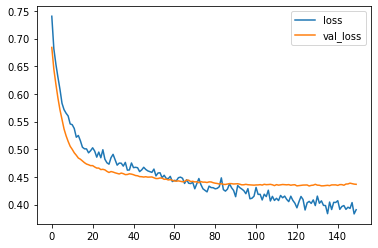

In [53]:
# 劃出 model.fit() training 和 validating 的 loss
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

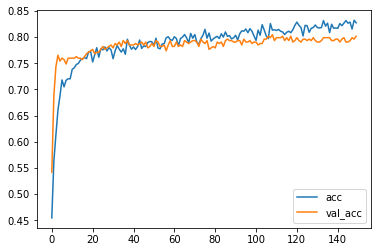

In [54]:
# 劃出準確性 accuracy 
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

In [55]:
pred_test = model2.predict(X1_test)
pred_test = np.round(pred_test).flatten()
cm2 = confusion_matrix(y1_test, pred_test)
cm2

array([[133,  40],
       [ 31, 154]], dtype=int64)

In [58]:
# model3.save('./ROE_model.h5')

In [60]:
X2 = dF[['current_rate', #流動比率
        'quick_rate',  #速動比率
        'debt_rate',  #負債比率
        'operating_gross_rate', #營業毛利率
        'cash_reinvest_rate', #現金再投資比率
        'avg_director_rate', #董監事持股比利
        'avg_director_pledge_rate', #董監事質押比利
        'foreign_rate_bys', #外資持股比例
        'over1000_rate_bys', # >1000張大股東持股比率
        'under400_rate_bys', # <400張股東持股比率
        'avg_board_bys', #平均持股張數
        'import_kgm_weight_2801', 
        'import_kgm_weight_2804', 
        'import_kgm_weight_37071000',
        'import_kgm_weight_37079090',
        'import_kgm_weight_37050000306',
        'import_kgm_weight_848620',
        'import_kgm_weight_848610',
        'import_kgm_weight_381800',
        'import_usd_value_2801',
        'import_usd_value_2804',
        'import_usd_value_37071000',
        'import_usd_value_37079090',
        'import_usd_value_37050000306',
        'import_usd_value_848620',
        'import_usd_value_848610',
        'import_usd_value_381800',
        'avg_import_rate']]

y1 = dF['roe_rate1']
print("X2.shape: " ,X2.shape)
print("y1.shape: " ,y1.shape)
print('y1.sum():',y1.sum())


X2.shape:  (1788, 28)
y1.shape:  (1788,)
y1.sum(): 960


In [61]:
# 輸入數據調成標準值以免各特徵影響不同
# you'll learn why scaling is needed in a later course
# from sklearn.preprocessing import StandardScaler
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x-df_input.mean())/ df_input.std()))

In [62]:
X2_scaled = pd.DataFrame()
a, b = X2.shape

for i in range(b):
    x2_new = mean_norm(X2[X2.columns[i]])
    X2_scaled.insert(i,X2.columns[i],x2_new)
X2_scaled

,current_rate,quick_rate,debt_rate,operating_gross_rate,cash_reinvest_rate,avg_director_rate,avg_director_pledge_rate,foreign_rate_bys,over1000_rate_bys,under400_rate_bys,...,import_kgm_weight_381800,import_usd_value_2801,import_usd_value_2804,import_usd_value_37071000,import_usd_value_37079090,import_usd_value_37050000306,import_usd_value_848620,import_usd_value_848610,import_usd_value_381800,avg_import_rate
0,-0.497595,-0.459666,-0.824804,0.293646,-0.233499,0.437739,-0.405628,-0.643864,0.842469,-0.637059,...,2.607759,0.607816,0.873659,3.202946,-1.567540,1.947167,-0.919408,0.507874,1.220076,0.653842
1,-0.468749,-0.443455,-0.904884,0.406062,-0.268016,0.437739,-0.405628,-0.643864,0.848042,-0.632518,...,0.917523,0.235140,1.179605,-0.221142,-0.910931,-1.158397,-1.443423,-0.746428,0.252971,0.825146
2,-0.457062,-0.444712,-0.933148,0.254882,-0.253346,0.437739,-0.405628,-0.645352,0.856400,-0.652700,...,0.823792,-1.122463,-0.371026,-0.510036,-1.571685,-1.201959,-0.134577,1.164965,-0.636468,0.805381
3,-0.450589,-0.432874,-0.918427,0.063776,-0.196393,0.437739,-0.405628,-0.648822,0.847577,-0.661277,...,0.181897,-1.029294,-0.409459,0.378658,-1.103626,-0.462705,-0.688372,-0.446934,-0.473152,1.094339
4,-0.461485,-0.427728,-0.870144,-0.064920,-0.010865,0.437739,-0.405628,-0.648822,0.847113,-0.664809,...,-0.016736,-1.814574,-1.755620,-0.155109,-0.327041,0.985745,0.142716,-1.364410,-1.333264,1.151754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,-0.160125,-0.271150,-0.264240,-0.220751,0.176390,-0.080402,0.701591,1.672838,-0.113698,-0.093660,...,-0.886284,-0.523520,-1.234248,-0.062938,0.855898,-0.419579,-1.037881,-1.147719,-0.110196,-0.078436
1784,-0.009934,-0.128851,-0.504482,-0.304094,0.069387,-0.049547,1.151263,1.395210,-0.318027,0.255488,...,-0.794414,-0.283943,-0.926280,-0.629721,0.712116,-0.075871,-0.318811,-0.206010,-0.818228,-0.494460
1785,-0.118567,-0.154049,-0.361397,-0.287038,0.589730,-0.039650,1.142565,1.471558,-0.344497,0.222692,...,-0.827550,0.408168,-0.046369,-0.482523,1.101297,0.232115,1.293136,-0.842049,0.113753,-1.168382
1786,-0.201031,-0.246508,-0.171205,-0.028870,-0.702930,-0.039650,1.142565,1.545922,-0.256728,0.045091,...,-0.413000,1.858940,0.668347,-0.427495,0.792771,0.843731,1.050693,2.173759,0.961710,-1.510991


In [63]:
#分割資料為 測試集 與 訓練集
from sklearn.model_selection import train_test_split
X2_train, X2_test, y1_train, y1_test = train_test_split(X2_scaled, y1, test_size=0.2,random_state=1)
N, D = X2_train.shape
print ("N:", N, "D:", D)

N: 1430 D: 28


<h2> 2-2 以 DNN 實作預測 ROE 加入美元匯率 + ALL 出口資料 

In [81]:
# 建立TF模型 for 淨利
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

#編譯模型
lr = 0.0003
model3.compile(tf.keras.optimizers.Adam(learning_rate = lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               3712      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 訓練模型
r3 = model3.fit(X2_train, y1_train, validation_data=(X2_test, y1_test), epochs=120)

# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model3.evaluate(X2_train, y1_train))
print("Test score:", model3.evaluate(X2_test, y1_test))

Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5420 - val_loss: 0.6659 - val_accuracy: 0.5615
Epoch 2/120
45/45 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.5895 - val_loss: 0.6406 - val_accuracy: 0.6620
Epoch 3/120
45/45 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6287 - val_loss: 0.6191 - val_accuracy: 0.6844
Epoch 4/120
45/45 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6580 - val_loss: 0.6017 - val_accuracy: 0.7151
Epoch 5/120
45/45 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6692 - val_loss: 0.5880 - val_accuracy: 0.7263
Epoch 6/120
45/45 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6769 - val_loss: 0.5715 - val_accuracy: 0.7318
Epoch 7/120
45/45 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.6972 - val_loss: 0.5618 - val_accuracy: 0.7346
Epoch 8/120
4

Epoch 59/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7965 - val_loss: 0.4807 - val_accuracy: 0.7709
Epoch 60/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7895 - val_loss: 0.4818 - val_accuracy: 0.7682
Epoch 61/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7944 - val_loss: 0.4811 - val_accuracy: 0.7737
Epoch 62/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7916 - val_loss: 0.4821 - val_accuracy: 0.7709
Epoch 63/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7979 - val_loss: 0.4809 - val_accuracy: 0.7709
Epoch 64/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8028 - val_loss: 0.4780 - val_accuracy: 0.7793
Epoch 65/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.7986 - val_loss: 0.4792 - val_accuracy: 0.7821
Epoch 

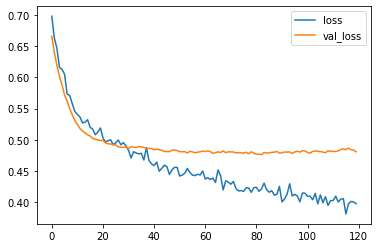

In [84]:
# 劃出 model.fit() training 和 validating 的 loss
import matplotlib.pyplot as plt
plt.plot(r3.history['loss'], label='loss')
plt.plot(r3.history['val_loss'], label='val_loss')
plt.legend()

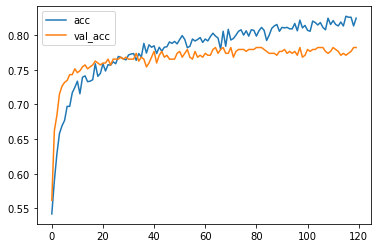

In [85]:
# 劃出準確性 accuracy 
plt.plot(r3.history['accuracy'], label='acc')
plt.plot(r3.history['val_accuracy'], label='val_acc')
plt.legend()

In [86]:
pred_test = model3.predict(X2_test)
pred_test = np.round(pred_test).flatten()
cm3 = confusion_matrix(y1_test, pred_test)
cm3

array([[133,  40],
       [ 38, 147]], dtype=int64)

In [ ]:
# plt.savefig()

## 2-3 分批加入同品項的進口值、進口量與美元匯率

In [117]:
# 輸入數據調成標準值以免各特徵影響不同
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x-df_input.mean())/ df_input.std()))
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 以迴圈處理

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_50 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_51 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.4874 - val_loss: 0.6729

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8000 - val_loss: 0.4571 - val_accuracy: 0.7765
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8154 - val_loss: 0.4566 - val_accuracy: 0.7709
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8112 - val_loss: 0.4569 - val_accuracy: 0.7765
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8147 - val_loss: 0.4555 - val_accuracy: 0.7793
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8112 - val_loss: 0.4549 - val_accuracy: 0.7765
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8147 - val_loss: 0.4548 - val_accuracy: 0.7821
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8084 - val_loss: 0.4547 - val_accuracy: 0.7793

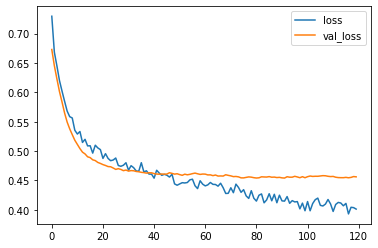

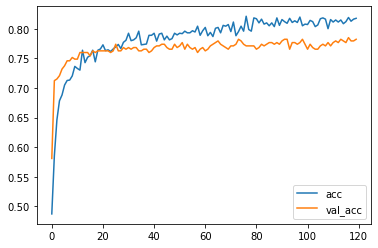

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_52 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_53 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5455 - val_loss: 0.6219

45/45 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8182 - val_loss: 0.4445 - val_accuracy: 0.7849
Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8168 - val_loss: 0.4468 - val_accuracy: 0.7905
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8210 - val_loss: 0.4458 - val_accuracy: 0.7849
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8245 - val_loss: 0.4468 - val_accuracy: 0.7905
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8189 - val_loss: 0.4458 - val_accuracy: 0.7877
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8084 - val_loss: 0.4469 - val_accuracy: 0.7877
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8119 - val_loss: 0.4458 - val_accuracy: 0.7877
Epoch 115/120

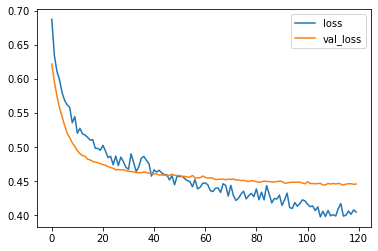

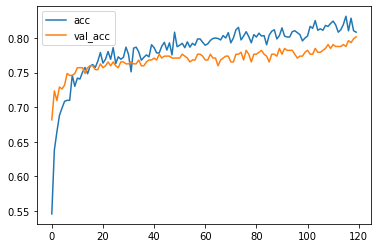

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_54 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_55 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5573 - val_loss: 0.6502

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8049 - val_loss: 0.4490 - val_accuracy: 0.7933
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8014 - val_loss: 0.4481 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8084 - val_loss: 0.4489 - val_accuracy: 0.7849
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8168 - val_loss: 0.4501 - val_accuracy: 0.7877
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8315 - val_loss: 0.4487 - val_accuracy: 0.7849
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8140 - val_loss: 0.4477 - val_accuracy: 0.7877
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8182 - val_loss: 0.4454 - val_accuracy: 0.7905

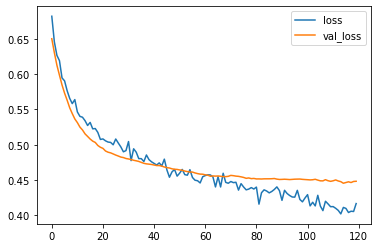

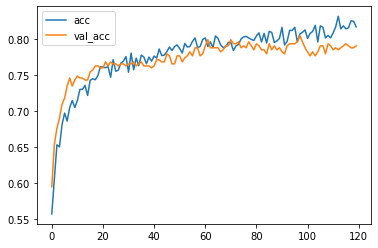

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_56 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_57 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7191 - accuracy: 0.5552 - val_loss: 0.6822

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8217 - val_loss: 0.4574 - val_accuracy: 0.7933
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8147 - val_loss: 0.4585 - val_accuracy: 0.7765
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8168 - val_loss: 0.4577 - val_accuracy: 0.7849
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8105 - val_loss: 0.4591 - val_accuracy: 0.7821
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8077 - val_loss: 0.4602 - val_accuracy: 0.7877
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8119 - val_loss: 0.4592 - val_accuracy: 0.7905
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8161 - val_loss: 0.4598 - val_accuracy: 0.7821

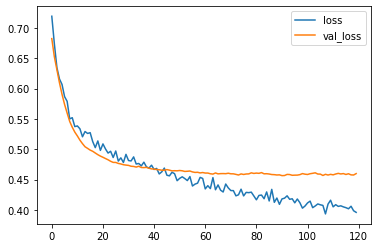

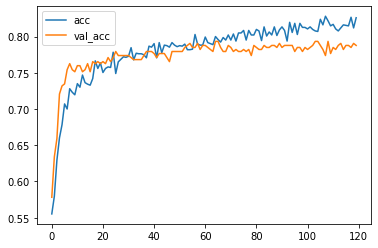

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_58 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_59 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.6779 - accuracy: 0.5706 - val_loss: 0.6403

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8168 - val_loss: 0.4517 - val_accuracy: 0.7961
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8196 - val_loss: 0.4545 - val_accuracy: 0.7821
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8161 - val_loss: 0.4526 - val_accuracy: 0.7933
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8035 - val_loss: 0.4532 - val_accuracy: 0.7905
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8119 - val_loss: 0.4542 - val_accuracy: 0.7933
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8105 - val_loss: 0.4543 - val_accuracy: 0.7877
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8070 - val_loss: 0.4544 - val_accuracy: 0.7821

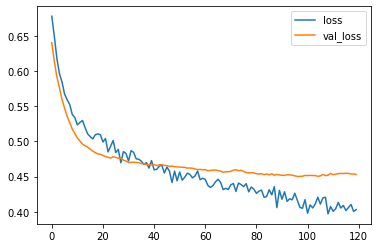

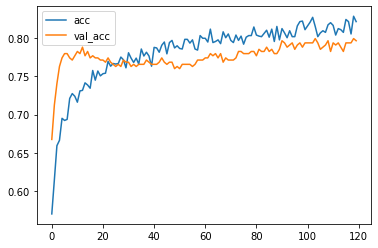

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_61 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7234 - accuracy: 0.5105 - val_loss: 0.6777

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8154 - val_loss: 0.4440 - val_accuracy: 0.7877
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8140 - val_loss: 0.4423 - val_accuracy: 0.7821
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8098 - val_loss: 0.4435 - val_accuracy: 0.7821
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8217 - val_loss: 0.4434 - val_accuracy: 0.7821
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8161 - val_loss: 0.4432 - val_accuracy: 0.7849
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8140 - val_loss: 0.4417 - val_accuracy: 0.7849
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8077 - val_loss: 0.4422 - val_accuracy: 0.7933

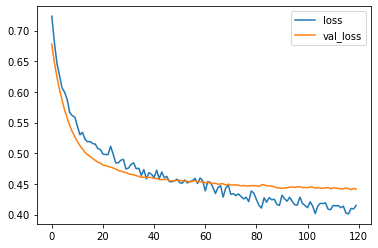

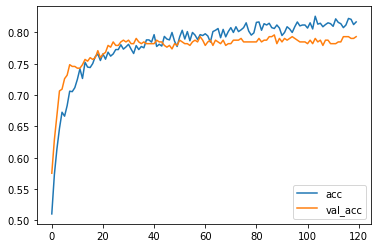

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_62 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_63 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.5063 - val_loss: 0.6634

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8084 - val_loss: 0.4444 - val_accuracy: 0.7793
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8168 - val_loss: 0.4429 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7993 - val_loss: 0.4434 - val_accuracy: 0.7877
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8077 - val_loss: 0.4429 - val_accuracy: 0.7905
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8105 - val_loss: 0.4424 - val_accuracy: 0.7933
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8028 - val_loss: 0.4433 - val_accuracy: 0.7849
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8126 - val_loss: 0.4442 - val_accuracy: 0.7877

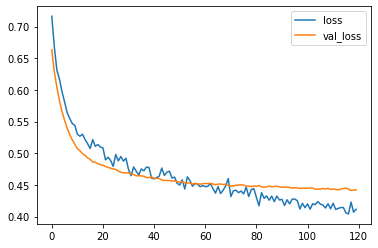

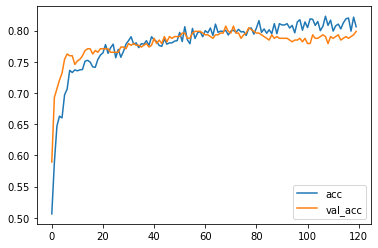

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_64 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_65 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.5280 - val_loss: 0.6486

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8231 - val_loss: 0.4371 - val_accuracy: 0.7821
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8203 - val_loss: 0.4374 - val_accuracy: 0.7877
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8140 - val_loss: 0.4364 - val_accuracy: 0.7849
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8280 - val_loss: 0.4371 - val_accuracy: 0.7849
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8070 - val_loss: 0.4368 - val_accuracy: 0.7821
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8154 - val_loss: 0.4357 - val_accuracy: 0.7821
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8343 - val_loss: 0.4376 - val_accuracy: 0.7849

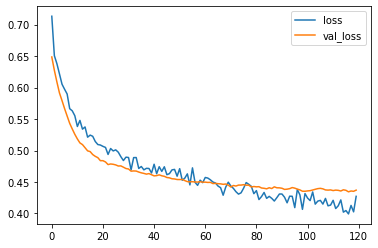

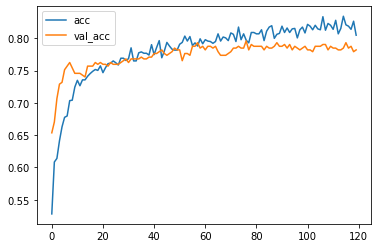

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_66 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_67 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.5587 - val_loss: 0.6425

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8063 - val_loss: 0.4489 - val_accuracy: 0.7877
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8070 - val_loss: 0.4484 - val_accuracy: 0.7933
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8287 - val_loss: 0.4472 - val_accuracy: 0.7905
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8035 - val_loss: 0.4474 - val_accuracy: 0.7877
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8140 - val_loss: 0.4459 - val_accuracy: 0.7933
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8098 - val_loss: 0.4456 - val_accuracy: 0.7961
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8126 - val_loss: 0.4464 - val_accuracy: 0.7961

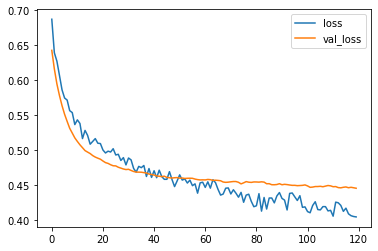

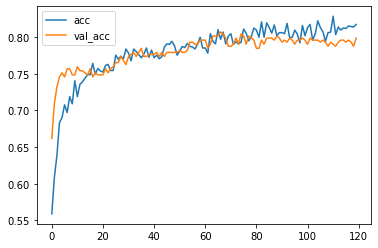

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_69 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5594 - val_loss: 0.6387

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8056 - val_loss: 0.4380 - val_accuracy: 0.8101
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8147 - val_loss: 0.4386 - val_accuracy: 0.8073
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8217 - val_loss: 0.4398 - val_accuracy: 0.8017
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8126 - val_loss: 0.4391 - val_accuracy: 0.8045
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8056 - val_loss: 0.4383 - val_accuracy: 0.8128
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8091 - val_loss: 0.4391 - val_accuracy: 0.8017
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8084 - val_loss: 0.4399 - val_accuracy: 0.8045

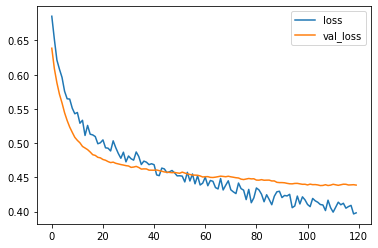

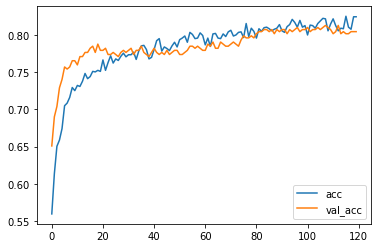

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_70 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_71 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 3ms/step - loss: 0.6790 - accuracy: 0.5587 - val_loss: 0.6477

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8112 - val_loss: 0.4574 - val_accuracy: 0.7849
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8119 - val_loss: 0.4580 - val_accuracy: 0.7849
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8154 - val_loss: 0.4572 - val_accuracy: 0.7877
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8245 - val_loss: 0.4583 - val_accuracy: 0.7793
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8294 - val_loss: 0.4587 - val_accuracy: 0.7821
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8182 - val_loss: 0.4587 - val_accuracy: 0.7905
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8147 - val_loss: 0.4590 - val_accuracy: 0.7793

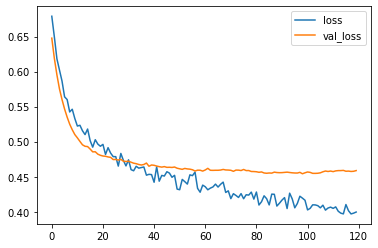

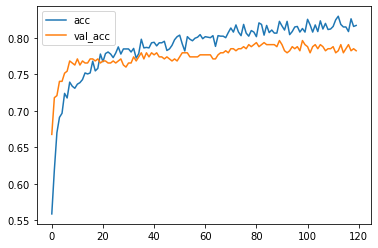

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_73 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7137 - accuracy: 0.5189 - val_loss: 0.6664

45/45 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8189 - val_loss: 0.4551 - val_accuracy: 0.7849
Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8056 - val_loss: 0.4547 - val_accuracy: 0.7849
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8189 - val_loss: 0.4547 - val_accuracy: 0.7821
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8112 - val_loss: 0.4533 - val_accuracy: 0.7821
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8217 - val_loss: 0.4528 - val_accuracy: 0.7849
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8077 - val_loss: 0.4536 - val_accuracy: 0.7821
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8154 - val_loss: 0.4546 - val_accuracy: 0.7905
Epoch 115/120

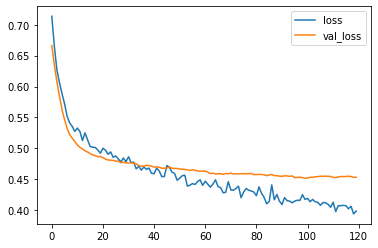

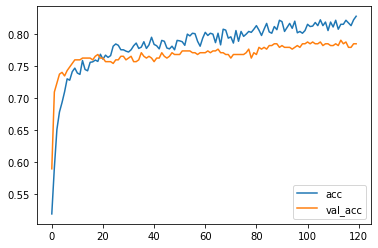

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_75 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5650 - val_loss: 0.6429

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8175 - val_loss: 0.4515 - val_accuracy: 0.7905
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8308 - val_loss: 0.4518 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8077 - val_loss: 0.4524 - val_accuracy: 0.7933
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8147 - val_loss: 0.4517 - val_accuracy: 0.7905
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8217 - val_loss: 0.4524 - val_accuracy: 0.7905
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8084 - val_loss: 0.4515 - val_accuracy: 0.7905
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8168 - val_loss: 0.4512 - val_accuracy: 0.7905

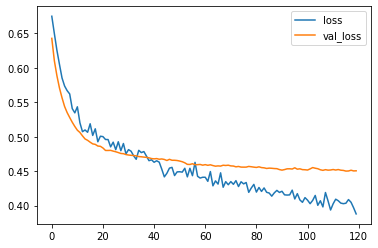

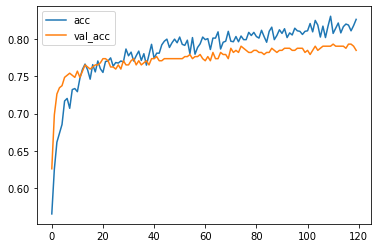

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_76 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_77 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 5ms/step - loss: 0.7196 - accuracy: 0.4979 - val_loss: 0.6753

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8168 - val_loss: 0.4574 - val_accuracy: 0.7737
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8077 - val_loss: 0.4590 - val_accuracy: 0.7737
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8154 - val_loss: 0.4573 - val_accuracy: 0.7709
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8245 - val_loss: 0.4562 - val_accuracy: 0.7765
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8189 - val_loss: 0.4573 - val_accuracy: 0.7737
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8245 - val_loss: 0.4588 - val_accuracy: 0.7737
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8147 - val_loss: 0.4583 - val_accuracy: 0.7682

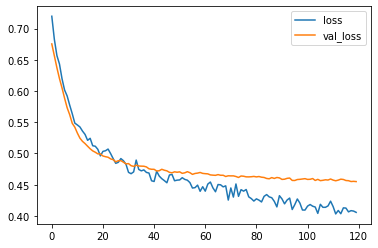

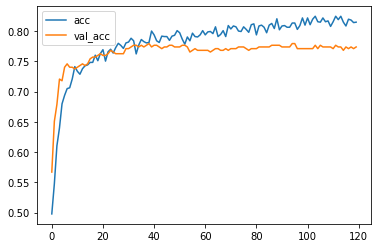

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_78 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_79 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5420 - val_loss: 0.6598

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8203 - val_loss: 0.4480 - val_accuracy: 0.7849
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8098 - val_loss: 0.4492 - val_accuracy: 0.7793
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8231 - val_loss: 0.4502 - val_accuracy: 0.7765
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8217 - val_loss: 0.4514 - val_accuracy: 0.7793
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8049 - val_loss: 0.4493 - val_accuracy: 0.7793
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8126 - val_loss: 0.4493 - val_accuracy: 0.7793
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8147 - val_loss: 0.4485 - val_accuracy: 0.7793

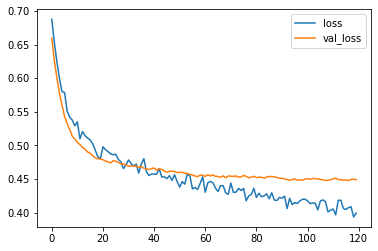

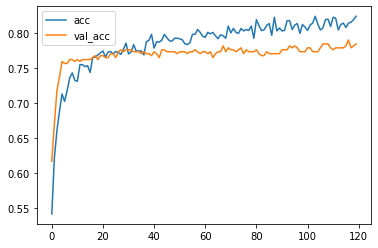

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_80 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_81 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5671 - val_loss: 0.6470

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8168 - val_loss: 0.4417 - val_accuracy: 0.7961
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8133 - val_loss: 0.4417 - val_accuracy: 0.7961
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8147 - val_loss: 0.4404 - val_accuracy: 0.7961
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8224 - val_loss: 0.4413 - val_accuracy: 0.7989
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8084 - val_loss: 0.4402 - val_accuracy: 0.8017
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8154 - val_loss: 0.4404 - val_accuracy: 0.8045
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8112 - val_loss: 0.4403 - val_accuracy: 0.8017

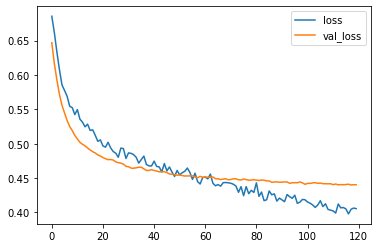

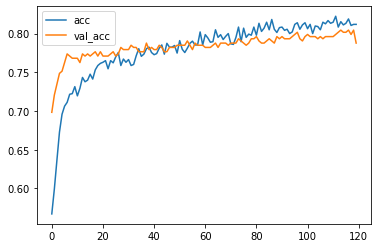

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_82 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_83 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7156 - accuracy: 0.5112 - val_loss: 0.6786

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8189 - val_loss: 0.4585 - val_accuracy: 0.7877
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8182 - val_loss: 0.4611 - val_accuracy: 0.7793
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.7979 - val_loss: 0.4574 - val_accuracy: 0.7821
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8154 - val_loss: 0.4584 - val_accuracy: 0.7849
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8196 - val_loss: 0.4582 - val_accuracy: 0.7849
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8245 - val_loss: 0.4590 - val_accuracy: 0.7793
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8217 - val_loss: 0.4564 - val_accuracy: 0.7877

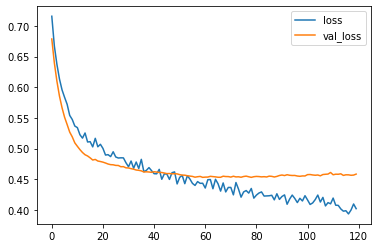

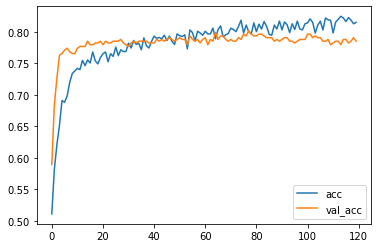

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_84 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_85 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.5077 - val_loss: 0.6771

45/45 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8126 - val_loss: 0.4405 - val_accuracy: 0.7961
Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8056 - val_loss: 0.4408 - val_accuracy: 0.7961
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8056 - val_loss: 0.4405 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8063 - val_loss: 0.4397 - val_accuracy: 0.7933
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8042 - val_loss: 0.4399 - val_accuracy: 0.7933
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8238 - val_loss: 0.4381 - val_accuracy: 0.7961
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8210 - val_loss: 0.4374 - val_accuracy: 0.7989
Epoch 115/120

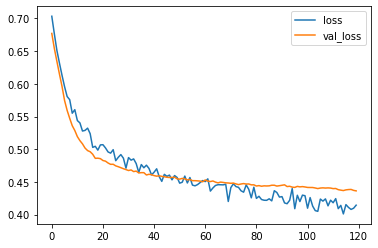

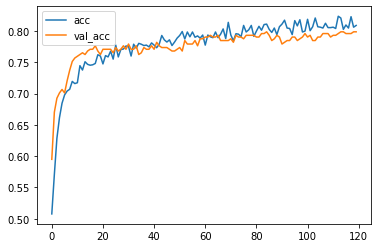

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_86 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_87 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5469 - val_loss: 0.6676

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8182 - val_loss: 0.4473 - val_accuracy: 0.7933
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8189 - val_loss: 0.4488 - val_accuracy: 0.7989
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8112 - val_loss: 0.4485 - val_accuracy: 0.7989
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8175 - val_loss: 0.4477 - val_accuracy: 0.7989
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8147 - val_loss: 0.4468 - val_accuracy: 0.7961
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8175 - val_loss: 0.4462 - val_accuracy: 0.7989
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8147 - val_loss: 0.4469 - val_accuracy: 0.8073

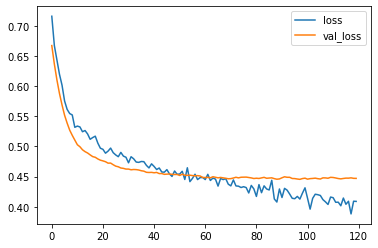

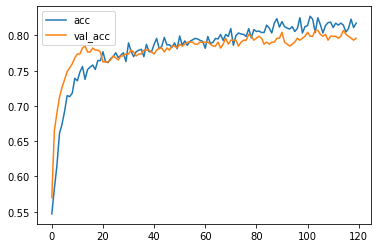

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_88 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_89 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7238 - accuracy: 0.5217 - val_loss: 0.6882

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8042 - val_loss: 0.4495 - val_accuracy: 0.7877
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8112 - val_loss: 0.4511 - val_accuracy: 0.7933
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8189 - val_loss: 0.4505 - val_accuracy: 0.7905
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8168 - val_loss: 0.4497 - val_accuracy: 0.7849
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8098 - val_loss: 0.4498 - val_accuracy: 0.7849
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8126 - val_loss: 0.4504 - val_accuracy: 0.7821
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8070 - val_loss: 0.4495 - val_accuracy: 0.7765

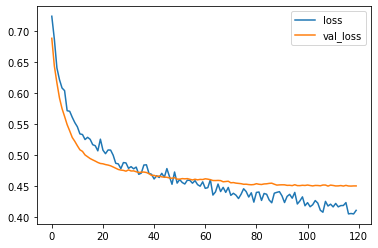

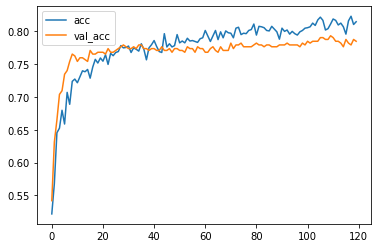

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_90 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_91 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5448 - val_loss: 0.6726

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8028 - val_loss: 0.4573 - val_accuracy: 0.7849
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8147 - val_loss: 0.4569 - val_accuracy: 0.7793
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8147 - val_loss: 0.4558 - val_accuracy: 0.7793
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8280 - val_loss: 0.4561 - val_accuracy: 0.7793
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8189 - val_loss: 0.4569 - val_accuracy: 0.7849
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8273 - val_loss: 0.4586 - val_accuracy: 0.7765
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8245 - val_loss: 0.4588 - val_accuracy: 0.7793

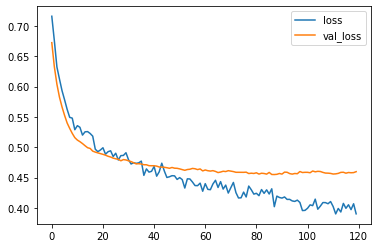

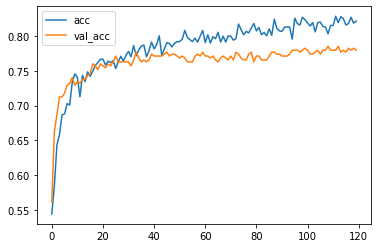

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_92 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_93 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.5147 - val_loss: 0.6699

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8126 - val_loss: 0.4564 - val_accuracy: 0.7682
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8245 - val_loss: 0.4554 - val_accuracy: 0.7709
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8189 - val_loss: 0.4565 - val_accuracy: 0.7709
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8168 - val_loss: 0.4562 - val_accuracy: 0.7654
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8112 - val_loss: 0.4547 - val_accuracy: 0.7709
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8231 - val_loss: 0.4536 - val_accuracy: 0.7654
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8252 - val_loss: 0.4551 - val_accuracy: 0.7682

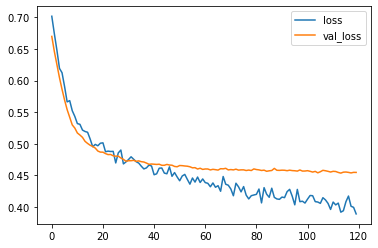

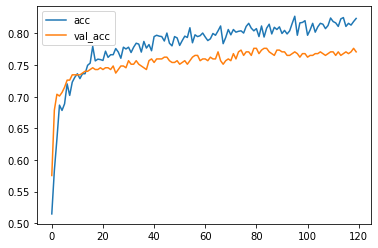

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_94 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_95 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.6946 - accuracy: 0.5399 - val_loss: 0.6654

45/45 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8189 - val_loss: 0.4565 - val_accuracy: 0.7821
Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8203 - val_loss: 0.4542 - val_accuracy: 0.7765
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8210 - val_loss: 0.4571 - val_accuracy: 0.7821
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8245 - val_loss: 0.4535 - val_accuracy: 0.7793
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8252 - val_loss: 0.4535 - val_accuracy: 0.7793
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8147 - val_loss: 0.4540 - val_accuracy: 0.7793
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8126 - val_loss: 0.4554 - val_accuracy: 0.7849
Epoch 115/120

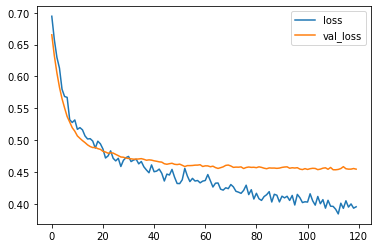

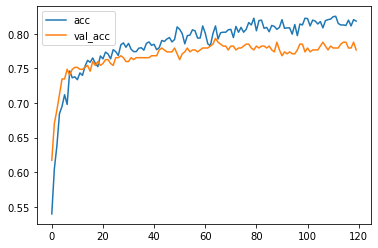

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_96 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_97 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.6797 - accuracy: 0.5713 - val_loss: 0.6541

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8210 - val_loss: 0.4488 - val_accuracy: 0.7905
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8224 - val_loss: 0.4495 - val_accuracy: 0.7877
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8294 - val_loss: 0.4491 - val_accuracy: 0.7933
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8112 - val_loss: 0.4480 - val_accuracy: 0.7877
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8035 - val_loss: 0.4481 - val_accuracy: 0.7849
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8091 - val_loss: 0.4488 - val_accuracy: 0.7849
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8210 - val_loss: 0.4487 - val_accuracy: 0.7905

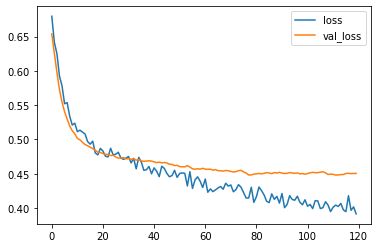

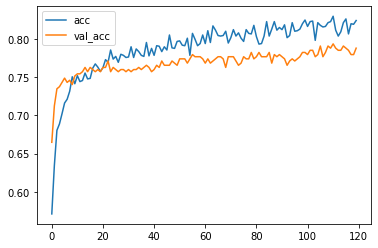

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_98 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_99 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7211 - accuracy: 0.5042 - val_loss: 0.6690

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8175 - val_loss: 0.4605 - val_accuracy: 0.7793
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8210 - val_loss: 0.4598 - val_accuracy: 0.7821
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8238 - val_loss: 0.4610 - val_accuracy: 0.7765
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8112 - val_loss: 0.4609 - val_accuracy: 0.7821
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8182 - val_loss: 0.4589 - val_accuracy: 0.7793
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8224 - val_loss: 0.4586 - val_accuracy: 0.7793
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8119 - val_loss: 0.4575 - val_accuracy: 0.7793

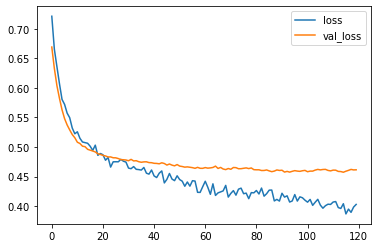

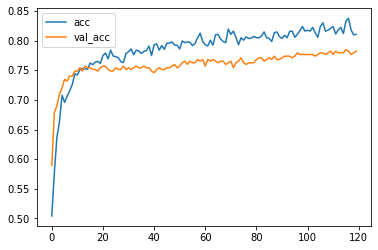

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_100 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_101 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5734 - val_loss: 0.6489

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8238 - val_loss: 0.4363 - val_accuracy: 0.8073
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8021 - val_loss: 0.4367 - val_accuracy: 0.8017
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8035 - val_loss: 0.4370 - val_accuracy: 0.8017
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8063 - val_loss: 0.4374 - val_accuracy: 0.8045
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8140 - val_loss: 0.4385 - val_accuracy: 0.7989
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8168 - val_loss: 0.4377 - val_accuracy: 0.8017
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8217 - val_loss: 0.4367 - val_accuracy: 0.8073

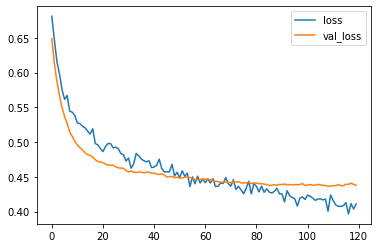

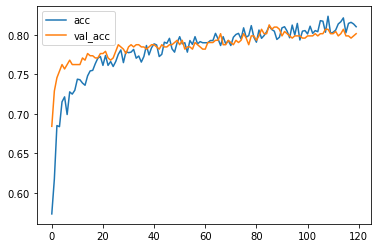

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_102 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_103 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7349 - accuracy: 0.4657 - val_loss: 0.6901

Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8175 - val_loss: 0.4460 - val_accuracy: 0.7905
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8063 - val_loss: 0.4463 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8070 - val_loss: 0.4479 - val_accuracy: 0.7905
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8147 - val_loss: 0.4460 - val_accuracy: 0.7933
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8231 - val_loss: 0.4463 - val_accuracy: 0.7905
Epoch 114/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8168 - val_loss: 0.4457 - val_accuracy: 0.7905
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8091 - val_loss: 0.4446 - val_accuracy: 0.7989

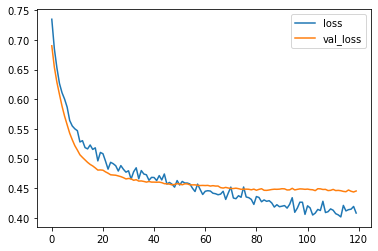

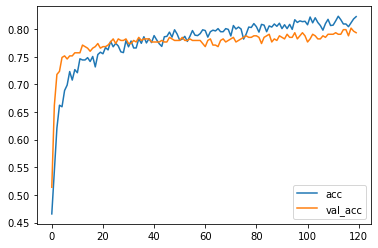

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_104 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_157 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_105 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.7228 - accuracy: 0.5042 - val_loss: 0.6680

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8021 - val_loss: 0.4434 - val_accuracy: 0.7933
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8091 - val_loss: 0.4431 - val_accuracy: 0.7933
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8098 - val_loss: 0.4441 - val_accuracy: 0.7933
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8119 - val_loss: 0.4414 - val_accuracy: 0.7989
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8161 - val_loss: 0.4429 - val_accuracy: 0.7961
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8084 - val_loss: 0.4414 - val_accuracy: 0.7961
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8154 - val_loss: 0.4421 - val_accuracy: 0.7877

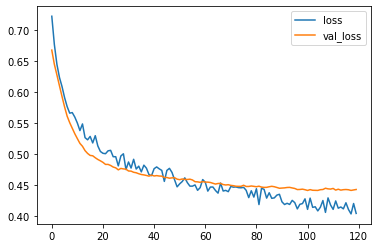

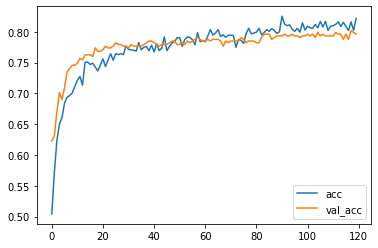

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_106 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_160 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_107 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 4ms/step - loss: 0.6910 - accuracy: 0.5762 - val_loss: 0.6364

45/45 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8063 - val_loss: 0.4475 - val_accuracy: 0.7877
Epoch 109/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8140 - val_loss: 0.4481 - val_accuracy: 0.7793
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8056 - val_loss: 0.4475 - val_accuracy: 0.7793
Epoch 111/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8119 - val_loss: 0.4473 - val_accuracy: 0.7821
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8049 - val_loss: 0.4448 - val_accuracy: 0.7905
Epoch 113/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8147 - val_loss: 0.4461 - val_accuracy: 0.7877
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8035 - val_loss: 0.4460 - val_accuracy: 0.7877
Epoch 115/120

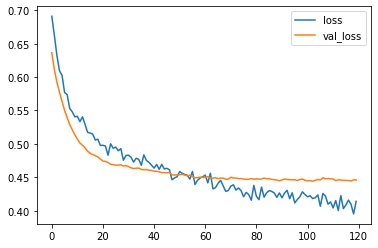

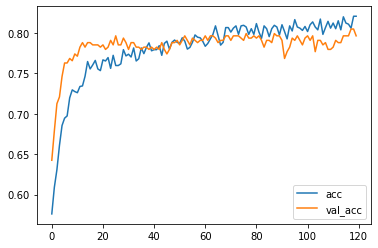

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_108 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_109 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5503 - val_loss: 0.6509

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8224 - val_loss: 0.4472 - val_accuracy: 0.7821
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8168 - val_loss: 0.4476 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8098 - val_loss: 0.4472 - val_accuracy: 0.7905
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8189 - val_loss: 0.4477 - val_accuracy: 0.7961
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8161 - val_loss: 0.4468 - val_accuracy: 0.7961
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8245 - val_loss: 0.4471 - val_accuracy: 0.7849
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8056 - val_loss: 0.4486 - val_accuracy: 0.7961

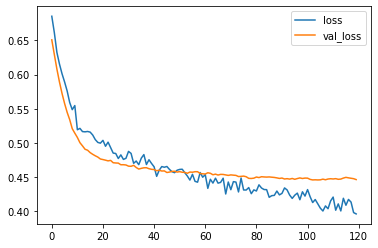

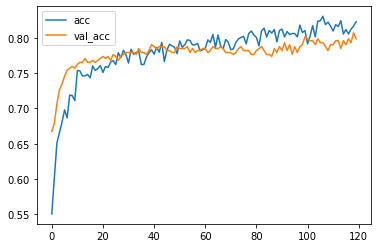

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_110 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_166 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_111 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5490 - val_loss: 0.6474

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8042 - val_loss: 0.4567 - val_accuracy: 0.7821
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8126 - val_loss: 0.4571 - val_accuracy: 0.7765
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8217 - val_loss: 0.4579 - val_accuracy: 0.7765
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8035 - val_loss: 0.4573 - val_accuracy: 0.7793
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8147 - val_loss: 0.4579 - val_accuracy: 0.7793
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8224 - val_loss: 0.4587 - val_accuracy: 0.7821
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8287 - val_loss: 0.4569 - val_accuracy: 0.7849

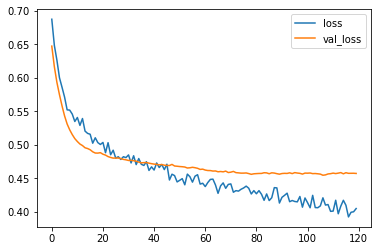

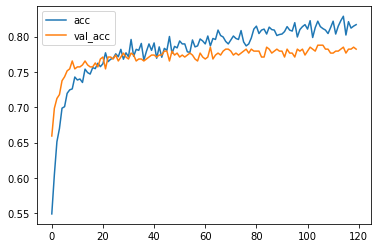

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_112 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_113 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 5ms/step - loss: 0.6765 - accuracy: 0.5552 - val_loss: 0.6534

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8091 - val_loss: 0.4620 - val_accuracy: 0.7793
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8091 - val_loss: 0.4628 - val_accuracy: 0.7793
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8175 - val_loss: 0.4634 - val_accuracy: 0.7821
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8070 - val_loss: 0.4638 - val_accuracy: 0.7765
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8161 - val_loss: 0.4636 - val_accuracy: 0.7765
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8084 - val_loss: 0.4624 - val_accuracy: 0.7821
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8105 - val_loss: 0.4635 - val_accuracy: 0.7793

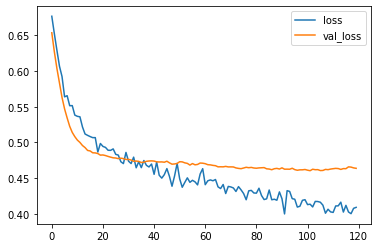

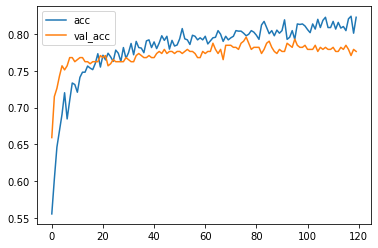

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_114 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_172 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_115 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 5ms/step - loss: 0.7919 - accuracy: 0.4545 - val_loss: 0.6951

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8126 - val_loss: 0.4414 - val_accuracy: 0.7933
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8168 - val_loss: 0.4424 - val_accuracy: 0.7961
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8196 - val_loss: 0.4413 - val_accuracy: 0.8017
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8028 - val_loss: 0.4417 - val_accuracy: 0.8017
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8280 - val_loss: 0.4396 - val_accuracy: 0.8045
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8175 - val_loss: 0.4396 - val_accuracy: 0.8045
Epoch 115/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8182 - val_loss: 0.4403 - val_accuracy: 0.8045

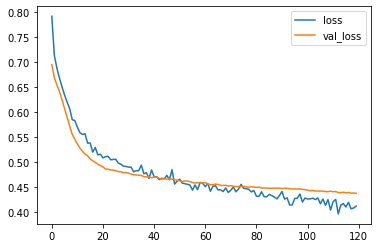

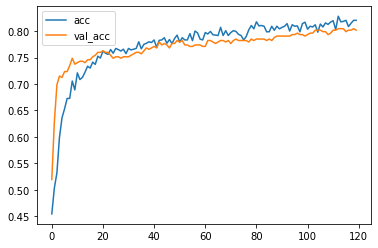

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_116 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_175 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_117 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5615 - val_loss: 0.6563

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8168 - val_loss: 0.4578 - val_accuracy: 0.7933
Epoch 110/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8147 - val_loss: 0.4578 - val_accuracy: 0.7905
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8287 - val_loss: 0.4574 - val_accuracy: 0.7961
Epoch 112/120
45/45 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8189 - val_loss: 0.4572 - val_accuracy: 0.7933
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8133 - val_loss: 0.4574 - val_accuracy: 0.7933
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8217 - val_loss: 0.4581 - val_accuracy: 0.7905
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8161 - val_loss: 0.4585 - val_accuracy: 0.7933

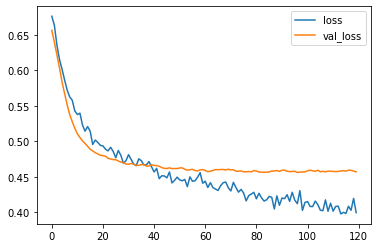

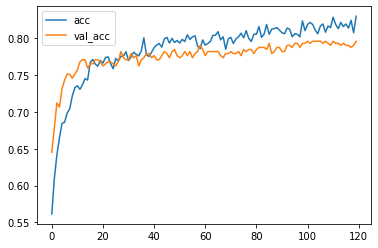

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 128)               1920      
_________________________________________________________________
dropout_118 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_178 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_119 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 17        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
45/45 [==============================] - 1s 3ms/step - loss: 0.7002 - accuracy: 0.5231 - val_loss: 0.6768

Epoch 109/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8168 - val_loss: 0.4661 - val_accuracy: 0.7626
Epoch 110/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8161 - val_loss: 0.4651 - val_accuracy: 0.7709
Epoch 111/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8301 - val_loss: 0.4659 - val_accuracy: 0.7682
Epoch 112/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8140 - val_loss: 0.4660 - val_accuracy: 0.7709
Epoch 113/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8147 - val_loss: 0.4667 - val_accuracy: 0.7765
Epoch 114/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8168 - val_loss: 0.4683 - val_accuracy: 0.7709
Epoch 115/120
45/45 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8084 - val_loss: 0.4657 - val_accuracy: 0.7765

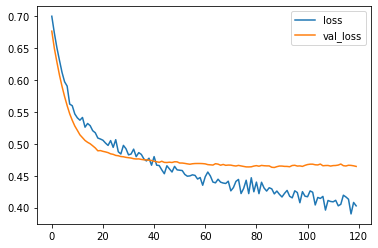

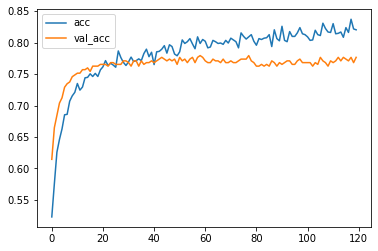

[['2801', 0.36050930619239807, 0.8475524187088013, 0.45617198944091797, 0.7821229100227356], ['2801', 0.3601401150226593, 0.8510489463806152, 0.4457755386829376, 0.8016759753227234], ['2801', 0.3666333556175232, 0.8412587642669678, 0.4482376277446747, 0.7905027866363525], ['2801', 0.3555302023887634, 0.8454545736312866, 0.45977288484573364, 0.7877094745635986], ['2801', 0.3564205467700958, 0.8531468510627747, 0.45291098952293396, 0.7960894107818604], ['2804', 0.3640952408313751, 0.8468531370162964, 0.4418672025203705, 0.7932960987091064], ['2804', 0.36549705266952515, 0.8419580459594727, 0.44211462140083313, 0.7988826632499695], ['2804', 0.3668830990791321, 0.8531468510627747, 0.4370613694190979, 0.7821229100227356], ['2804', 0.3656422793865204, 0.8384615182876587, 0.44497382640838623, 0.7988826632499695], ['2804', 0.3580572307109833, 0.8531468510627747, 0.4386311173439026, 0.8044692873954773], ['37071000', 0.35664883255958557, 0.8517482280731201, 0.4587061405181885, 0.7821229100227356

In [122]:
#輸入字串迴圈
# import_list = ['import_kgm_weight_2801', 'import_kgm_weight_2804', 'import_kgm_weight_37071000', 'import_kgm_weight_37079090',
#                'import_kgm_weight_37050000306', 'import_kgm_weight_848620', 'import_kgm_weight_848610', 'import_kgm_weight_381800']
# result_list = []
# for item in import_list:
#     Xt = dF[['current_rate', #流動比率
#             'quick_rate',  #速動比率
#             'debt_rate',  #負債比率
#             'operating_gross_rate', #營業毛利率
#             'cash_reinvest_rate', #現金再投資比率
#             'avg_director_rate', #董監事持股比利
#             'avg_director_pledge_rate', #董監事質押比利
#             'foreign_rate_bys', #外資持股比例
#             'over1000_rate_bys', # >1000張大股東持股比率
#             'under400_rate_bys', # <400張股東持股比率
#             'avg_board_bys', #平均持股張數
#             item, 
#             'avg_import_rate']]
    
#輸入字串迴圈寫法:
import_list = ['2801', '2804', '37071000', '37079090', '37050000306', '848620', '848610', '381800']
result_list = []
for item in range(len(import_list)-1):
    Xt = dF[['current_rate', #流動比率
            'quick_rate',  #速動比率
            'debt_rate',  #負債比率
            'operating_gross_rate', #營業毛利率
            'cash_reinvest_rate', #現金再投資比率
            'avg_director_rate', #董監事持股比利
            'avg_director_pledge_rate', #董監事質押比利
            'foreign_rate_bys', #外資持股比例
            'over1000_rate_bys', # >1000張大股東持股比率
            'under400_rate_bys', # <400張股東持股比率
            'avg_board_bys', #平均持股張數
            f'import_kgm_weight_{import_list[item]}', 
            f'import_usd_value_{import_list[item]}',
            'avg_import_rate']]

    y1 = dF['roe_rate1']

    Xt_scaled = pd.DataFrame()
    a, b = Xt.shape

    for i in range(b):
        xt_new = mean_norm(Xt[Xt.columns[i]])
        Xt_scaled.insert(i,Xt.columns[i],xt_new)


    #分割資料為 測試集 與 訓練集
    Xt_train, Xt_test, y1_train, y1_test = train_test_split(Xt_scaled, y1, test_size=0.2, random_state=1)
    N, D = Xt_train.shape

    for i in range(1,6):
        # 建立TF模型 for 淨利
        modelt = tf.keras.models.Sequential([
          tf.keras.layers.Input(shape=(D,)),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(1, activation='sigmoid')
          ])

        #編譯模型
        lr = 0.0003
        modelt.compile(tf.keras.optimizers.Adam(learning_rate = lr),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        modelt.summary()

        # 訓練模型
        rt = modelt.fit(Xt_train, y1_train, validation_data=(Xt_test, y1_test), epochs=120)
        tmp = [str(import_list[item])]
        tmp.extend(modelt.evaluate(Xt_train, y1_train))
        tmp.extend(modelt.evaluate(Xt_test, y1_test))

        # 評估模型 - evaluate() returns loss and accuracy
        print("Train score:", modelt.evaluate(Xt_train, y1_train))
        print("Test score:", modelt.evaluate(Xt_test, y1_test))
        result_list.append(tmp)

        plt.plot(rt.history['loss'], label='loss')
        plt.plot(rt.history['val_loss'], label='val_loss')
        plt.legend()
        plt.savefig(f'./results/loss_{import_list[item]}_{i}.png')#儲存圖片
        plt.show() 

        plt.plot(rt.history['accuracy'], label='acc')
        plt.plot(rt.history['val_accuracy'], label='val_acc')
        plt.legend()
        plt.savefig(f'./results/accuracy_{import_list[item]}_{i}.png')#儲存圖片
        plt.show() 

result_pd = pd.DataFrame(result_list,columns=["item","train_loss","train_accuracy","test_loss","test_accuracy"])
result_pd.to_csv("./results/improt_factor.csv")
print(result_list)


In [86]:
pred_test = model3.predict(X2_test)
pred_test = np.round(pred_test).flatten()
cm3 = confusion_matrix(y1_test, pred_test)
cm3

array([[133,  40],
       [ 38, 147]], dtype=int64)